In [1]:
import pandas as pd
import sqlite3
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
conn = sqlite3.connect('database.sqlite')

c = conn.cursor()

In [3]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Matches
""")
df_matches = pd.DataFrame(c.fetchall())
df_matches.columns = [x[0] for x in c.description]
print(df_matches.info())
df_matches




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 9 columns):
Match_ID    24625 non-null int64
Div         24625 non-null object
Season      24625 non-null int64
Date        24625 non-null object
HomeTeam    24625 non-null object
AwayTeam    24625 non-null object
FTHG        24625 non-null int64
FTAG        24625 non-null int64
FTR         24625 non-null object
dtypes: int64(4), object(5)
memory usage: 1.7+ MB
None


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
...,...,...,...,...,...,...,...,...,...
24620,46770,E0,2016,2017-05-21,Liverpool,Middlesbrough,3,0,H
24621,46771,E0,2016,2017-05-21,Man United,Crystal Palace,2,0,H
24622,46772,E0,2016,2017-05-21,Southampton,Stoke,0,1,A
24623,46773,E0,2016,2017-05-21,Swansea,West Brom,2,1,H


In [4]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Teams""")
df_teams = pd.DataFrame(c.fetchall())
df_teams.columns = [x[0] for x in c.description]
print(df_teams.info())
df_teams



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
Season                    468 non-null object
TeamName                  468 non-null object
KaderHome                 468 non-null object
AvgAgeHome                468 non-null object
ForeignPlayersHome        468 non-null object
OverallMarketValueHome    468 non-null object
AvgMarketValueHome        468 non-null object
StadiumCapacity           468 non-null object
dtypes: object(8)
memory usage: 29.4+ KB
None


,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271
...,...,...,...,...,...,...,...,...
463,2005,Paderborn,33,24,13,7530000,228000,47728
464,2005,Unterhaching,28,26,9,7030000,251000,47728
465,2005,Offenbach,28,26,13,6280000,224000,47728
466,2005,Siegen,29,26,13,6180000,213000,47728


In [5]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Teams_in_Matches""")
df_teams_in_matches = pd.DataFrame(c.fetchall())
df_teams_in_matches.columns = [x[0] for x in c.description]
print(df_teams_in_matches.info())
df_teams_in_matches



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49148 entries, 0 to 49147
Data columns (total 2 columns):
Match_ID          49148 non-null int64
Unique_Team_ID    49148 non-null int64
dtypes: int64(2)
memory usage: 768.1 KB
None


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
...,...,...
49143,46772,123
49144,46773,117
49145,46773,126
49146,46774,85


In [6]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Unique_Teams""")
df_unique_teams = pd.DataFrame(c.fetchall())
df_unique_teams.columns = [x[0] for x in c.description]
print(df_unique_teams.info())
df_unique_teams



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
TeamName          128 non-null object
Unique_Team_ID    128 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
...,...,...
123,Burnley,124
124,Blackpool,125
125,Swansea,126
126,Cardiff,127


In [7]:
c.execute("""
SELECT *
FROM Matches
WHERE Season = 2011
""")
df_matches = pd.DataFrame(c.fetchall())
df_matches.columns = [x[0] for x in c.description]
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [8]:
df_matches['HomeTeam'].nunique()

56

In [9]:
df_unique_teams.nunique()

TeamName          128
Unique_Team_ID    128
dtype: int64

In [10]:
Home_Goals = df_matches.groupby('HomeTeam')['FTHG'].sum()
Home_Goals

HomeTeam
Aachen                15
Arsenal               39
Aston Villa           20
Augsburg              20
Bayern Munich         49
Blackburn             26
Bochum                23
Bolton                23
Braunschweig          21
Chelsea               41
Cottbus               18
Dortmund              44
Dresden               30
Duisburg              23
Ein Frankfurt         38
Erzgebirge Aue        19
Everton               28
FC Koln               20
Fortuna Dusseldorf    35
Frankfurt FSV         20
Freiburg              24
Fulham                36
Greuther Furth        46
Hamburg               19
Hannover              31
Hansa Rostock         20
Hertha                19
Hoffenheim            21
Ingolstadt            28
Kaiserslautern        12
Karlsruhe             23
Leverkusen            28
Liverpool             24
M'gladbach            29
Mainz                 27
Man City              55
Man United            52
Munich 1860           35
Newcastle             29
Norwich         

In [11]:
Away_Goals = df_matches.groupby('AwayTeam')['FTAG'].sum()
Away_Goals

AwayTeam
Aachen                15
Arsenal               35
Aston Villa           17
Augsburg              16
Bayern Munich         28
Blackburn             22
Bochum                18
Bolton                23
Braunschweig          16
Chelsea               24
Cottbus               12
Dortmund              36
Dresden               20
Duisburg              19
Ein Frankfurt         38
Erzgebirge Aue        12
Everton               22
FC Koln               19
Fortuna Dusseldorf    29
Frankfurt FSV         23
Freiburg              21
Fulham                12
Greuther Furth        27
Hamburg               16
Hannover              10
Hansa Rostock         14
Hertha                19
Hoffenheim            20
Ingolstadt            15
Kaiserslautern        12
Karlsruhe             11
Leverkusen            24
Liverpool             23
M'gladbach            20
Mainz                 20
Man City              38
Man United            37
Munich 1860           27
Newcastle             27
Norwich         

In [12]:
Home_Goals = df_matches.groupby('HomeTeam')['FTHG'].sum()
Away_Goals = df_matches.groupby('AwayTeam')['FTAG'].sum()

df_Total_Goals = pd.DataFrame(data = Home_Goals + Away_Goals).reset_index()

df_Total_Goals.columns = ['TeamName', 'TotalGoals']
df_Total_Goals

,TeamName,TotalGoals
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77
5,Blackburn,48
6,Bochum,41
7,Bolton,46
8,Braunschweig,37
9,Chelsea,65


In [13]:
Home_Wins = df_matches[df_matches['FTR'] == 'H']['HomeTeam'].value_counts()
Away_Wins = df_matches[df_matches['FTR'] == 'A']['AwayTeam'].value_counts()

df_Total_Wins = pd.DataFrame(data = Home_Wins + Away_Wins).reset_index()
df_Total_Wins.columns = ['TeamName', 'TotalWins']
df_Total_Wins

,TeamName,TotalWins
0,Aachen,6
1,Arsenal,21
2,Aston Villa,7
3,Augsburg,8
4,Bayern Munich,23
5,Blackburn,8
6,Bochum,10
7,Bolton,10
8,Braunschweig,10
9,Chelsea,18


In [14]:
df_goals_and_wins = pd.merge(df_Total_Goals, df_Total_Wins, on='TeamName')

df_goals_and_wins

,TeamName,TotalGoals,TotalWins
0,Aachen,30,6
1,Arsenal,74,21
2,Aston Villa,37,7
3,Augsburg,36,8
4,Bayern Munich,77,23
5,Blackburn,48,8
6,Bochum,41,10
7,Bolton,46,10
8,Braunschweig,37,10
9,Chelsea,65,18


In [15]:
Away_losses = df_matches[df_matches['FTR'] == 'A']['HomeTeam'].value_counts()
Home_losses = df_matches[df_matches['FTR'] == 'H']['AwayTeam'].value_counts()

df_Total_Losses = pd.DataFrame(data = (Away_losses + Home_losses)).reset_index()
df_Total_Losses.columns = ['TeamName', 'TotalLosses']
df_Total_Losses['TotalLosses'].fillna(0, inplace=True)
df_Total_Losses

,TeamName,TotalLosses
0,Aachen,15.0
1,Arsenal,10.0
2,Aston Villa,14.0
3,Augsburg,12.0
4,Bayern Munich,7.0
5,Blackburn,23.0
6,Bochum,17.0
7,Bolton,22.0
8,Braunschweig,9.0
9,Chelsea,10.0


In [16]:
df_goals_and_wins_and_losses = pd.merge(df_goals_and_wins, df_Total_Losses, on='TeamName')

df_goals_and_wins_and_losses

,TeamName,TotalGoals,TotalWins,TotalLosses
0,Aachen,30,6,15.0
1,Arsenal,74,21,10.0
2,Aston Villa,37,7,14.0
3,Augsburg,36,8,12.0
4,Bayern Munich,77,23,7.0
5,Blackburn,48,8,23.0
6,Bochum,41,10,17.0
7,Bolton,46,10,22.0
8,Braunschweig,37,10,9.0
9,Chelsea,65,18,10.0


In [17]:
import time
import datetime
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [18]:
s= '2010-04-04'
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())

df_matches['TimeStamp'] = df_matches['Date'].map(lambda x: time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple()))

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 10 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
TimeStamp    992 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 77.6+ KB


In [19]:
df_matches.TimeStamp = df_matches.TimeStamp.astype(int)

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 10 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
TimeStamp    992 non-null int64
dtypes: int64(5), object(5)
memory usage: 77.6+ KB


In [20]:
Time = df_matches['TimeStamp'][0]
Time

1333148400

In [21]:
r = requests.get('https://api.darksky.net/forecast/8d7b1e6a06f0295d87ac41eab697fd52/52.5200,13.4050,1333148400')
r.status_code == requests.codes.ok

True

In [22]:
print(r.text)

{"latitude":52.52,"longitude":13.405,"timezone":"Europe/Berlin","currently":{"time":1333148400,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":39.23,"dewPoint":40.73,"humidity":0.8,"windSpeed":18.42,"windGust":18.42,"windBearing":287,"cloudCover":0.75,"uvIndex":0,"visibility":6.216},"hourly":{"summary":"Drizzle in the morning and afternoon.","icon":"rain","data":[{"time":1333144800,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":40.06,"dewPoint":40.56,"humidity":0.8,"windSpeed":14.96,"windGust":14.96,"windBearing":292,"cloudCover":0.75,"uvIndex":0,"visibility":6.216},{"time":1333148400,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":39.23,"dewPoint":40.73,"humidity":0.8,"windSpeed":18.42,"windGust":18.42,"windBearing"

In [23]:
r.json().keys()

for key in r.json().keys():
    print(key)
    value = r.json()[key] #Use standard dictionary formatting
    print(type(value)) #What type is it?
    print('\n\n') #Separate out data

latitude
<class 'float'>



longitude
<class 'float'>



timezone
<class 'str'>



currently
<class 'dict'>



hourly
<class 'dict'>



daily
<class 'dict'>



flags
<class 'dict'>



offset
<class 'int'>





In [24]:
RDICT = dict(r.json())

In [25]:
r.json()['daily']['data'][0]['icon']

'rain'

In [26]:

TimeStamp_List = list(df_matches['TimeStamp'])

TEST_LIST = TimeStamp_List[0:10]

In [27]:
df_test = df_matches.head()

df_test

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313190000
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200


In [28]:
berlin_lat = 52.5200
berlin_lon = 13.4050

In [29]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)
                         


keys = get_keys("/Users/apple/.secret/darksky_api.json")

api_key = keys['api_key']

api_key

'8d7b1e6a06f0295d87ac41eab697fd52'

In [30]:
def weather_day(self, date):
        api_key = self.get_keys()
        weather = requests.get(self.url.format(api_key,self.lat,self.long,date))
#         f_json = weather.json()
        weather =  weather.json()['daily']['data'][0]['icon']
        return weather
    
    
def weather_list(self, date_list = []):
        weather_dict = {'date': [], 'weather':[]}
        for date in date_list:
            weather_dict['date'].append(date)
            weather_dict['weather'].append(self.weather_day(date))
        return weather_dict

In [31]:
lat = berlin_lat
lon = berlin_lon
list_of_dates = TEST_LIST
weather_list = []

for date in list_of_dates:
        link = f'https://api.darksky.net/forecast/{api_key}/{lat},{lon},{date}'
        r = requests.get(link)
        darksky = r.json()
        weather = darksky['daily']['data'][0].get('icon', 0)
#         try:
#             weather = darksky['daily']['data'][0]['icon']
#         except KeyError:
#             weather = 0
#    
        weather_list.append(weather)
        
weather_list

['rain',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'wind',
 'partly-cloudy-day',
 'rain',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'rain',
 0]

In [32]:
len(list(df_matches['TimeStamp'].unique()))

165

In [40]:
lat = berlin_lat
lon = berlin_lon
list_of_dates = list(df_matches['TimeStamp'].unique())
weather_dict = {'TimeStamp': [], 'weather':[]}

for date in list_of_dates:
        link = f'https://api.darksky.net/forecast/{api_key}/{lat},{lon},{date}'
        r = requests.get(link)
        darksky = r.json()
        try:
            weather = darksky['daily']['data'][0]['icon']
        except KeyError:
            weather = 0
        weather_dict['TimeStamp'].append(date)
        weather_dict['weather'].append(weather)
    
        
        
weather_dict

{'TimeStamp': [1333148400,
  1323561600,
  1313190000,
  1322352000,
  1329523200,
  1327017600,
  1328313600,
  1334962800,
  1316300400,
  1319324400,
  1317423600,
  1330732800,
  1314399600,
  1331942400,
  1320537600,
  1336172400,
  1334098800,
  1324080000,
  1328227200,
  1319842800,
  1327190400,
  1322870400,
  1334358000,
  1332633600,
  1331337600,
  1333753200,
  1321660800,
  1318546800,
  1316818800,
  1335567600,
  1324166400,
  1330646400,
  1331856000,
  1329436800,
  1312585200,
  1320364800,
  1316127600,
  1310684400,
  1336258800,
  1328918400,
  1317510000,
  1333062000,
  1319238000,
  1314313200,
  1312671600,
  1330041600,
  1310857200,
  1329004800,
  1313967600,
  1315522800,
  1333234800,
  1316905200,
  1334876400,
  1322179200,
  1331251200,
  1320624000,
  1315609200,
  1313881200,
  1316991600,
  1332716400,
  1319929200,
  1329091200,
  1330214400,
  1324252800,
  1331424000,
  1322265600,
  1335135600,
  1323993600,
  1320451200,
  1334012400,
  13344

In [59]:
df_weather = pd.DataFrame.from_dict(weather_dict)

In [60]:
df_weather['weather'].value_counts()

partly-cloudy-day    71
0                    47
rain                 43
cloudy                1
wind                  1
clear-day             1
snow                  1
Name: weather, dtype: int64

In [61]:
df_weather.loc[df_weather['weather'] != 'rain', 'weather'] = 0
df_weather.loc[df_weather['weather'] == 'rain', 'weather'] = 1

In [62]:
df_weather['weather'].value_counts()

0    122
1     43
Name: weather, dtype: int64

In [63]:
df_matches = df_matches.merge(df_weather,how='left',left_on='TimeStamp',right_on='TimeStamp')

In [64]:
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313190000,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,0
...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,1336863600,0
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,1336863600,0
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,1336863600,0
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,1336863600,0


In [75]:
df_matches.rename(columns={'weather':'rain'}, inplace=True)

In [76]:
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp,rain
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313190000,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,0
...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,1336863600,0
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,1336863600,0
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,1336863600,0
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,1336863600,0


In [79]:
df_rain = df_matches[df_matches['rain'] == 1]

In [83]:
df_rain.reset_index(inplace=True)
df_rain

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp,rain
0,0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400,1
1,5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,1327017600,1
2,8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,1316300400,1
3,15,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A,1336172400,1
4,18,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A,1324080000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
214,975,44858,E0,2011,2012-05-06,Fulham,Sunderland,2,1,H,1336258800,1
215,976,44859,E0,2011,2012-05-06,Man United,Swansea,2,0,H,1336258800,1
216,977,44860,E0,2011,2012-05-06,Newcastle,Man City,0,2,A,1336258800,1
217,978,44861,E0,2011,2012-05-06,QPR,Stoke,1,0,H,1336258800,1


In [85]:
df_rain['HomeTeam'].nunique()

55

In [91]:
Home_Wins = df_rain[df_rain['FTR'] == 'H']['HomeTeam'].value_counts()
Away_Wins = df_rain[df_rain['FTR'] == 'A']['AwayTeam'].value_counts()

df_rain_wins = pd.DataFrame(data = Home_Wins + Away_Wins).reset_index()
df_rain_wins.columns = ['TeamName', 'RainWins']
df_rain_wins.fillna(0, inplace=True)



In [93]:
Away_losses = df_rain[df_rain['FTR'] == 'A']['HomeTeam'].value_counts()
Home_losses = df_rain[df_rain['FTR'] == 'H']['AwayTeam'].value_counts()

df_rain_losses = pd.DataFrame(data = (Away_losses + Home_losses)).reset_index()
df_rain_losses.columns = ['TeamName', 'RainLosses']
df_rain_losses.fillna(0, inplace=True)
df_rain_losses

,TeamName,RainLosses
0,Aachen,0.0
1,Arsenal,4.0
2,Aston Villa,0.0
3,Bayern Munich,2.0
4,Blackburn,4.0
5,Bochum,5.0
6,Bolton,4.0
7,Braunschweig,0.0
8,Chelsea,0.0
9,Cottbus,3.0


In [95]:
df_rain_wins_and_losses = pd.merge(df_rain_wins, df_rain_losses, on='TeamName')

df_rain_wins_and_losses

,TeamName,RainWins,RainLosses
0,Aachen,0.0,0.0
1,Arsenal,3.0,4.0
2,Bayern Munich,5.0,2.0
3,Blackburn,0.0,4.0
4,Bochum,2.0,5.0
5,Bolton,0.0,4.0
6,Braunschweig,4.0,0.0
7,Chelsea,5.0,0.0
8,Cottbus,2.0,3.0
9,Dortmund,5.0,0.0


In [102]:
df_rain_wins_and_losses['RainWin%'] = round(
    (df_rain_wins_and_losses.RainWins/(df_rain_wins_and_losses.RainWins+df_rain_wins_and_losses.RainLosses) * 100), 0)

df_rain_wins_and_losses.fillna(0, inplace=True)

df_rain_wins_and_losses

,TeamName,RainWins,RainLosses,RainWin%
0,Aachen,0.0,0.0,0.0
1,Arsenal,3.0,4.0,43.0
2,Bayern Munich,5.0,2.0,71.0
3,Blackburn,0.0,4.0,0.0
4,Bochum,2.0,5.0,29.0
5,Bolton,0.0,4.0,0.0
6,Braunschweig,4.0,0.0,100.0
7,Chelsea,5.0,0.0,100.0
8,Cottbus,2.0,3.0,40.0
9,Dortmund,5.0,0.0,100.0


In [115]:
class WeatherGetter(object):
    
 
    def __init__(self,lat,long):
        self.lat = lat
        self.long = long
        self.url = 'https://api.darksky.net/forecast/{}/{},{},{}'
        
         
    def get_keys(self,path="/Users/apple/.secret/darksky_api.json"):
        with open(path) as f:
            keys = json.load(f)
        return keys["api_key"]

    def weather_day(self, date):
        api_key = self.get_keys()
        weather = requests.get(self.url.format(api_key,self.lat,self.long,date))
        darksky = weather.json()
        try:
            weather = darksky['daily']['data'][0]['icon']
        except KeyError:
            weather = 0
        return weather
           
    def weather_list(self, date_list = []):
        weather_dict = {'TimeStamp': [], 'weather':[]}
        for date in date_list:
            weather_dict['TimeStamp'].append(date)
            weather_dict['weather'].append(self.weather_day(date))
        return weather_dict

In [118]:
lat = berlin_lat
long = berlin_lon

weather_test = WeatherGetter(berlin_lat, berlin_lon)
timestamp_weather = weather_test.weather_list(list(df_matches['TimeStamp'].head(10)))
df_timestamp_weather = pd.DataFrame(timestamp_weather)

df_timestamp_weather.loc[df_timestamp_weather['weather'] != 'rain', 'weather'] = 0
df_timestamp_weather.loc[df_timestamp_weather['weather'] == 'rain', 'weather'] = 1

df_timestamp_weather


,TimeStamp,weather
0,1333148400,1
1,1323561600,0
2,1313190000,0
3,1322352000,0
4,1329523200,0
5,1327017600,1
6,1328313600,0
7,1334962800,0
8,1316300400,1
9,1319324400,0


In [119]:
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp,rain
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313190000,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,0
...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,1336863600,0
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,1336863600,0
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,1336863600,0
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,1336863600,0


In [136]:
def convert(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d')

In [141]:
d = convert('2012-03-31')

datetime.datetime(2012, 3, 31, 0, 0)

In [149]:


df_matches.Date = df_matches.Date.astype(str)

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 11 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
TimeStamp    992 non-null int64
rain         992 non-null int64
dtypes: int64(6), object(5)
memory usage: 133.0+ KB


In [153]:
df_matches['DateTime'] = df_matches['Date'].map(lambda x : convert(x))

df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TimeStamp,rain,DateTime
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333148400,1,2012-03-31
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,0,2011-12-11
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313190000,0,2011-08-13
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,0,2011-11-27
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,0,2012-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,1336863600,0,2012-05-13
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,1336863600,0,2012-05-13
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,1336863600,0,2012-05-13
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,1336863600,0,2012-05-13


In [154]:

df_goals_and_wins_and_losses

,TeamName,TotalGoals,TotalWins,TotalLosses
0,Aachen,30,6,15.0
1,Arsenal,74,21,10.0
2,Aston Villa,37,7,14.0
3,Augsburg,36,8,12.0
4,Bayern Munich,77,23,7.0
5,Blackburn,48,8,23.0
6,Bochum,41,10,17.0
7,Bolton,46,10,22.0
8,Braunschweig,37,10,9.0
9,Chelsea,65,18,10.0


In [167]:
df_histogram = df_goals_and_wins_and_losses.drop('TotalLosses', 1)


df_histogram

,TeamName,TotalGoals,TotalWins
0,Aachen,30,6
1,Arsenal,74,21
2,Aston Villa,37,7
3,Augsburg,36,8
4,Bayern Munich,77,23
5,Blackburn,48,8
6,Bochum,41,10
7,Bolton,46,10
8,Braunschweig,37,10
9,Chelsea,65,18


In [171]:
columns = [df_histogram['TeamName']]
data = [[df_histogram['TotalGoals'], df_histogram['TotalWins']]]

In [172]:
values1_melted = pd.melt(data, id_vars=columns,\
                         value_vars=["values_a", "values_b"],\
                         var_name="source1", value_name="value_numbers1")

g1 = sns.barplot(x=columns[0], y="value_numbers1", hue="source1",\
                 data=values1_melted)

AttributeError: 'list' object has no attribute 'columns'

ValueError: Could not interpret input 'Aachen'

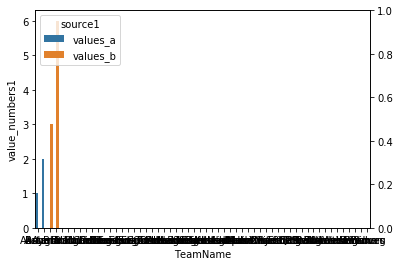

In [162]:
columns = ["labels", "values_a", "values_b", "values_x", "values_y"]
test_data = pd.DataFrame.from_records([("date1", 1, 3, 150, 170),\
                                       ("date2", 2, 6, 200, 180)],\
                                       columns=columns)


# values_a and values_b are not displayed
values1_melted = pd.melt(test_data, id_vars=columns[0],\
                         value_vars=["values_a", "values_b"],\
                         var_name="source1", value_name="value_numbers1")
values2_melted = pd.melt(test_data, id_vars=columns[0],\
                         value_vars=["values_x", "values_y"],\
                         var_name="source2", value_name="value_numbers2")
g1 = sns.barplot(x=df_goals_and_wins_and_losses['TeamName'], y="value_numbers1", hue="source1",\
                 data=values1_melted)
ax1 = plt.twinx()
g2 = sns.barplot(x=df_goals_and_wins_and_losses['TeamName'][0], y="value_numbers2", hue="source2",\
                 data=values2_melted, ax=ax1)
plt.show()